# Boosting algorithm
explain
Boosting algorithm
Boosting ek ensemble technique hai jo multiple weak learners (generally decision trees) ko combine karke ek strong learner banata hai. Iska main goal hota hai ki model ki accuracy ko improve kiya jaye, aur iske liye boosting sequentially (ek ke baad ek) models ko train karta hai. Har new model previous model ke errors ko correct karne ki koshish karta hai.
Boosting ka kaam kaise karta hai:

    Sequential learning: Sabse pehle ek weak model train hota hai. Phir, dusra model pehle wale model ke errors ko focus karke train hota hai, aur isi tarah har new model pichle models ke mistakes ko sudharne ki koshish karta hai.

    Weight adjustment: Agar pehla model kisi data point ko galat classify karta hai, to us galat classified point ko agle model me zyada weight diya jata hai. Isse agla model us point pe zyada focus karega.

Boosting ka goal:

    Bias ko reduce karna (model ki underfitting ko rokna).
    Variance ko reduce karna (model ki overfitting ko rokna).
    Overall accuracy ko improve karna.

Common Boosting Algorithms:

    AdaBoost (Adaptive Boosting)
    Gradient Boosting (GBM)
    XGBoost
    LightGBM
    CatBoost

Example:

Agar aapko ek running race me sabse tez daudne wale runner ka prediction karna ho:

    Boosting ki tarah, pehle ek weak runner ko train kiya jayega, jo apne errors ko sudharta jayega. Har runner apne previous runner ke galtiyon ko sudharke race me zyada achha perform karega.

In short, Boosting ek technique hai jo multiple weak models ko combine karke ek strong model banata hai, jisse model ki performance better hoti hai.


Here are the main boosting methods:
1. AdaBoost (Adaptive Boosting)

    How it works: AdaBoost sequentially trains weak learners (usually decision trees) by focusing on the misclassified samples from the previous round. Each subsequent model gives more weight to the misclassified examples.
    Purpose: Improve the accuracy of weak learners by focusing on difficult cases.
    Use case: Binary classification tasks.

2. Gradient Boosting (GBM)

    How it works: Gradient Boosting builds models sequentially, where each new model corrects the errors (residuals) of the previous one by fitting the residuals of the predictions using gradient descent.
    Purpose: Minimize the residual errors, improving the model iteratively.
    Use case: Both classification and regression tasks.

3. XGBoost (Extreme Gradient Boosting)

    How it works: XGBoost is an optimized version of Gradient Boosting, which includes additional features like regularization (to prevent overfitting), parallelization, and handling missing values. It’s known for being faster and more efficient.
    Purpose: High performance, speed, and accuracy in large datasets.
    Use case: Classification and regression tasks, particularly for competitions (e.g., Kaggle).

4. LightGBM (Light Gradient Boosting Machine)

    How it works: LightGBM uses a histogram-based approach for faster computation and a leaf-wise tree growth strategy to optimize performance. It’s designed for large datasets.
    Purpose: Fast and scalable, works efficiently with large datasets.
    Use case: High-performance applications on large datasets.

5. CatBoost

    How it works: CatBoost handles categorical features automatically without the need for extensive preprocessing. It also uses a symmetric tree structure for faster computation.
    Purpose: Handles categorical features efficiently, reducing the need for data preprocessing.
    Use case: Classification tasks, particularly with many categorical features.

Summary:

    AdaBoost: Focuses on correcting misclassified samples.
    Gradient Boosting (GBM): Iteratively improves predictions by correcting residuals.
    XGBoost: Optimized version of GBM with features like regularization and parallelization.
    LightGBM: Faster and more efficient than traditional gradient boosting, designed for large datasets.
    CatBoost: Specializes in handling categorical data automatically.

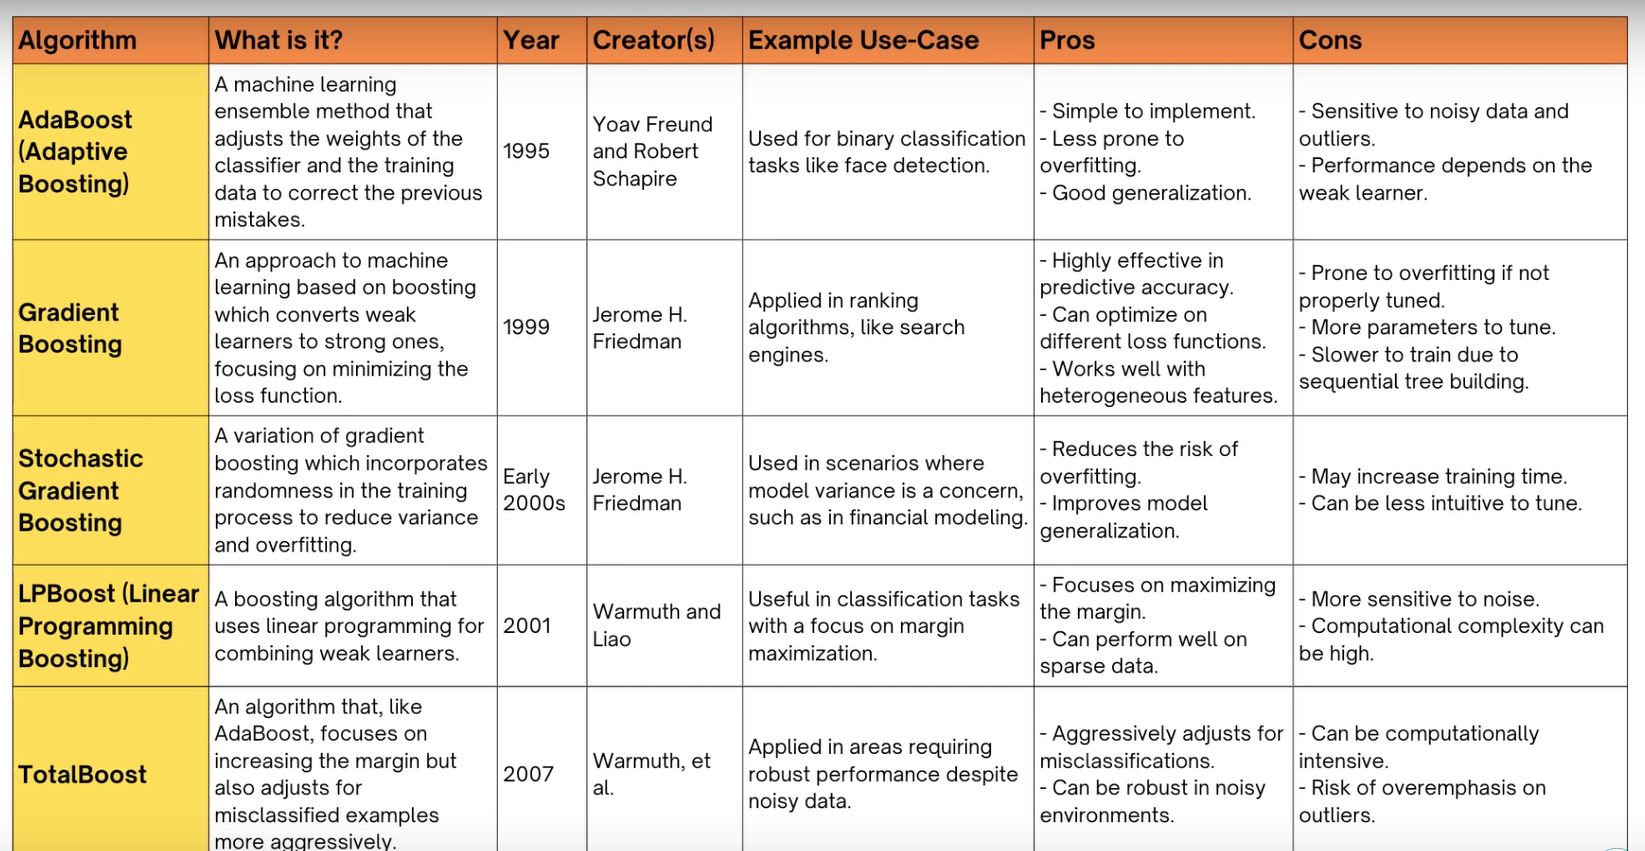
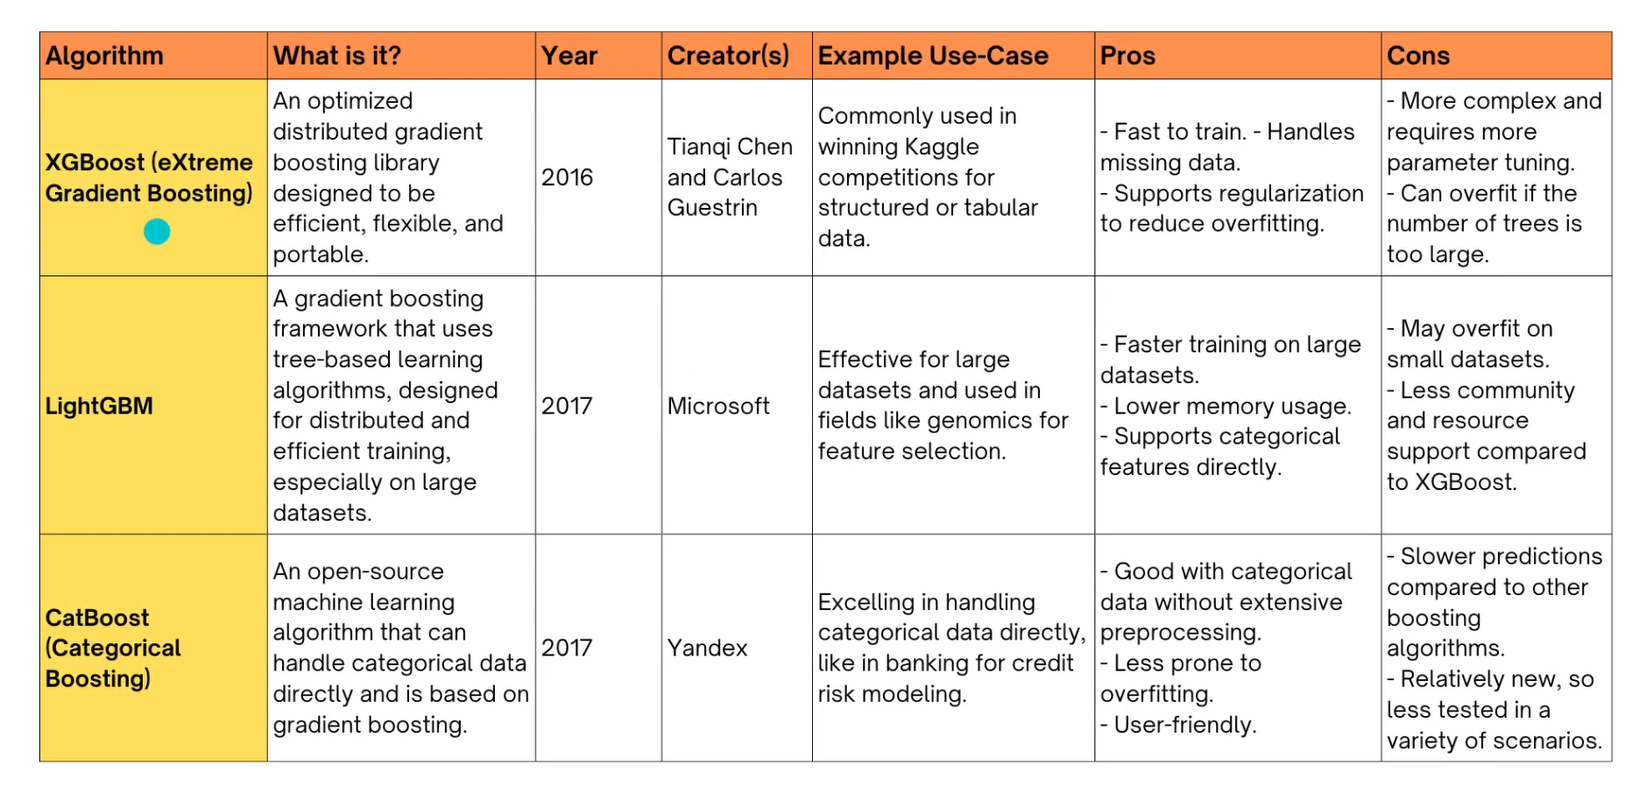

# lets do some coding


In [49]:
!pip install xgboost q


In [50]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

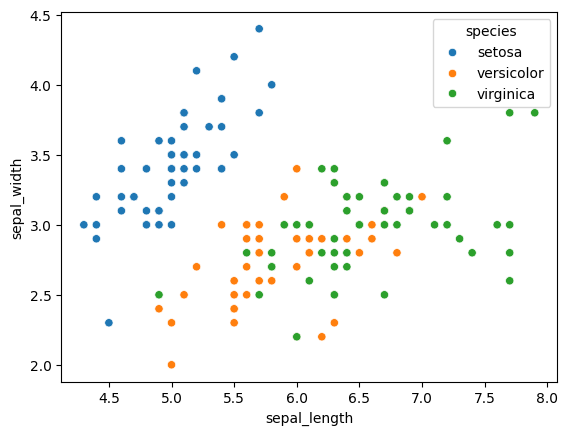

In [51]:
df=sns.load_dataset('iris')
df.head()

# plot the data as scatter plot for 2 things

sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')

# split the data in 80/20

X = df.drop('species', axis=1)
y = df['species']

# encode the target variable

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [52]:
%%time
# train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# predict the test data
y_pred = dt.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0
CPU times: total: 15.6 ms
Wall time: 17.7 ms


In [53]:
%%time
# train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predict the test data
y_pred = rf.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))


Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0
CPU times: total: 156 ms
Wall time: 238 ms


Encoding the Target (species):

    LabelEncoder converts species (setosa, versicolor, virginica) to integers: setosa → 0, versicolor → 1, virginica → 2.
    XGBoost (Extreme Gradient Boosting) requires encoding for categorical data because it is designed to work primarily with numerical input features. Categorical data, such as labels or categories (e.g., "red," "blue," "green"), must be converted into a numerical format before being used by XGBoost.
Why does XGBoost need an encoder?

    Mathematical Operations:
        XGBoost uses mathematical computations like split finding and gradient calculations. These operations require numerical inputs, so categorical data cannot be processed directly without encoding.

    Tree Splitting:
        Decision trees, the base learners used in XGBoost, split nodes based on numerical thresholds (e.g., feature > 0.5). For categorical features, the algorithm cannot determine meaningful thresholds unless the data is encoded numerically.

    Optimization and Gradient Calculation:
        XGBoost computes gradients and optimizes the loss function. These processes require numerical representations of the input data.

Types of Encoders for XGBoost:

    Label Encoding:
        Converts categories into integer labels (red → 0, blue → 1, green → 2).
        Best for: Ordinal categorical features where there is an inherent order (e.g., "small," "medium," "large").

    One-Hot Encoding:
        Converts categories into binary vectors (red → [1, 0, 0], blue → [0, 1, 0], green → [0, 0, 1]).
        Best for: Nominal categorical features without an inherent order.

    Target Encoding:
        Replaces categories with the mean of the target variable for each category.
        Best for: High-cardinality features (features with many unique categories).

Alternative: CatBoost or LightGBM

If you don't want to manually encode categorical data, you can use CatBoost or LightGBM, which natively support categorical features. These algorithms internally handle encoding and can often yield better performance for datasets with many categorical variables.

In [54]:
%%time
# x boost need encoder otherwise error
# now xgboost model


# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0
CPU times: total: 562 ms
Wall time: 275 ms


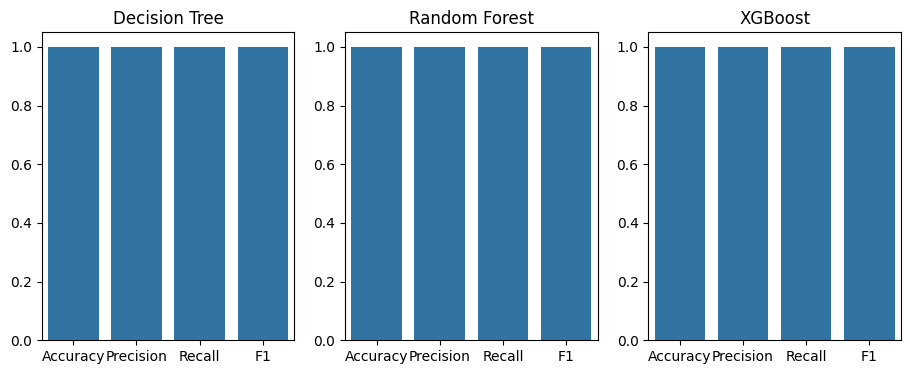

In [55]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
# plt.tight_layout()
plt.show()


Decision Tree: A single model, not an ensemble. It can be part of ensemble methods like Random Forest or XGBoost.

Random Forest: An ensemble of decision trees. It builds multiple decision trees and combines their predictions, usually by averaging or voting, to improve accuracy and reduce overfitting.

XGBoost: A boosting ensemble method. It builds decision trees sequentially, where each tree tries to correct the errors made by the previous one. This often results in stronger models compared to Random Forest.
Using Decision Tree, Random Forest, and XGBoost together allows you to compare different models based on their performance.

    Decision Tree: A simple model that is easy to interpret but prone to overfitting.
    Random Forest: An ensemble of decision trees that reduces overfitting by averaging multiple trees, improving accuracy.
    XGBoost: A more advanced ensemble technique using boosting, which sequentially corrects the errors of previous trees, often yielding better performance than Random Forest.

By comparing these models, you can choose the one that performs best for your specific dataset.

In [69]:
# ok lets use penguin dataset to test above algos
df=sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
